In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import community as community_louvain
from collections import Counter
import random
import itertools
from joblib import Parallel, delayed
from tqdm.autonotebook import tqdm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample
import xgboost as xgb

/var/folders/3n/m113wxf95cb6_mp91npt68c00000gn/T/ipykernel_89940/2071013862.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
G = nx.Graph()

with open('com-youtube.ungraph.txt', 'r') as file:
    for line in file:
        if line.startswith('#'):
            continue
        node1, node2 = map(int, line.strip().split())
        G.add_edge(node1, node2)

In [3]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 1134890
Number of edges: 2987624


In [4]:
degree_centrality = nx.degree_centrality(G)
degree_centrality 

{1: 2.5553159824440982e-05,
 2: 0.00022557272120885831,
 3: 1.0573721306665233e-05,
 4: 0.002425787896437449,
 5: 0.00016917954090664374,
 6: 8.811434422221028e-07,
 7: 8.811434422221028e-07,
 8: 8.811434422221028e-07,
 9: 8.811434422221028e-07,
 10: 8.811434422221028e-07,
 11: 9.956920897109761e-05,
 12: 8.811434422221028e-07,
 13: 0.00010397492618220813,
 14: 0.00010309378273998602,
 15: 0.00011631093437331757,
 16: 1.4979438517775748e-05,
 17: 1.7622868844442056e-06,
 18: 0.0003938711186732799,
 19: 3.08400204777736e-05,
 20: 6.1680040955547195e-06,
 21: 1.1454864748887337e-05,
 22: 0.0017552377369064287,
 376: 0.0009754257905398678,
 1219: 0.0004123751309599441,
 268635: 2.6434303266663084e-06,
 317880: 8.811434422221028e-06,
 665255: 8.811434422221028e-07,
 665256: 8.811434422221028e-07,
 665257: 8.811434422221028e-07,
 665258: 8.811434422221028e-07,
 40: 8.370862701109977e-05,
 106: 0.009217641549085418,
 107: 4.053259834221673e-05,
 126: 3.26023073622178e-05,
 134: 0.00011983550

In [5]:
degrees = [degree for node, degree in G.degree()]

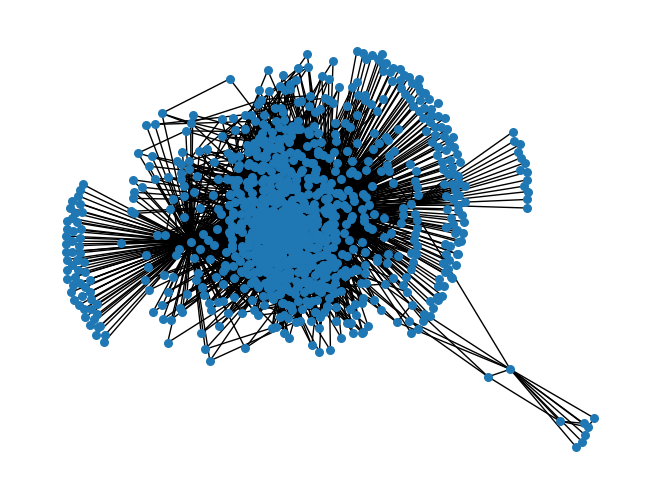

In [6]:
subgraph = G.subgraph(list(G.nodes)[:1000])
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=False, node_size=30)
plt.show()

In [7]:
partition = community_louvain.best_partition(G)
partition

{1: 0,
 2: 0,
 3: 1,
 4: 0,
 5: 2,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 3,
 20: 4,
 21: 0,
 22: 0,
 376: 0,
 1219: 0,
 268635: 0,
 317880: 5,
 665255: 0,
 665256: 0,
 665257: 0,
 665258: 0,
 40: 0,
 106: 0,
 107: 0,
 126: 0,
 134: 0,
 242: 0,
 247: 0,
 276: 0,
 291: 0,
 341: 0,
 363: 0,
 365: 0,
 367: 0,
 404: 0,
 446: 0,
 455: 0,
 480: 0,
 495: 0,
 514: 0,
 534: 0,
 688: 0,
 718: 0,
 723: 0,
 730: 0,
 762: 0,
 776: 0,
 797: 0,
 803: 0,
 839: 0,
 840: 0,
 847: 0,
 848: 0,
 851: 0,
 881: 0,
 882: 0,
 903: 0,
 940: 0,
 967: 0,
 1009: 0,
 1013: 6,
 1070: 0,
 1085: 0,
 1180: 0,
 1183: 0,
 1225: 7,
 1227: 0,
 1244: 43,
 1258: 9,
 1270: 0,
 1708: 0,
 1795: 10,
 1870: 10,
 1999: 0,
 2059: 0,
 2235: 0,
 2243: 0,
 2246: 0,
 2254: 0,
 2266: 0,
 2661: 3,
 2723: 3,
 2775: 3,
 2844: 0,
 2892: 0,
 2974: 0,
 3100: 11,
 3102: 361,
 3120: 11,
 3173: 0,
 3193: 0,
 3355: 6,
 3356: 11,
 3357: 6,
 3358: 1,
 3359: 0,
 3360: 3,
 3361: 13,
 3

In [8]:
community_sizes = Counter(partition.values())
community_sizes

Counter({0: 193510,
         1: 71626,
         2: 13677,
         3: 97356,
         4: 24,
         5: 1907,
         6: 125304,
         7: 8138,
         43: 4348,
         9: 24130,
         10: 39793,
         11: 96190,
         361: 2395,
         13: 12020,
         14: 9979,
         15: 4511,
         16: 20335,
         17: 7481,
         18: 1572,
         285: 1667,
         20: 11999,
         21: 19367,
         22: 19081,
         23: 38244,
         24: 50603,
         25: 9077,
         26: 1607,
         44: 18684,
         341: 12532,
         79: 3485,
         30: 12009,
         31: 6085,
         32: 861,
         33: 1209,
         195: 2085,
         137: 1622,
         268: 4980,
         37: 3,
         135: 2666,
         39: 2709,
         40: 11342,
         41: 2075,
         42: 10022,
         45: 7,
         46: 4,
         47: 7,
         392: 5285,
         49: 2287,
         50: 7387,
         51: 7,
         52: 6148,
         53: 8,
         54:

In [9]:
community_density_dict = {}

for community_id in set(partition.values()):
    nodes_in_community = [nodes for nodes in partition.keys() if partition[nodes] == community_id]
    subgraph = G.subgraph(nodes_in_community)
    community_density_dict[community_id] = nx.density(subgraph)

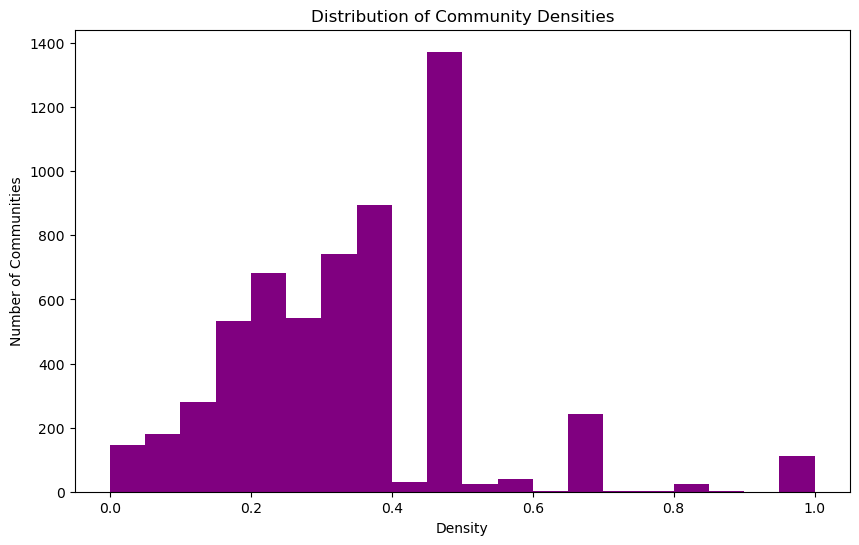

In [10]:
density_values = list(community_density_dict.values())

plt.figure(figsize=(10, 6))
plt.hist(density_values, bins=20, color='purple')
plt.title('Distribution of Community Densities')
plt.xlabel('Density')
plt.ylabel('Number of Communities')
plt.show()

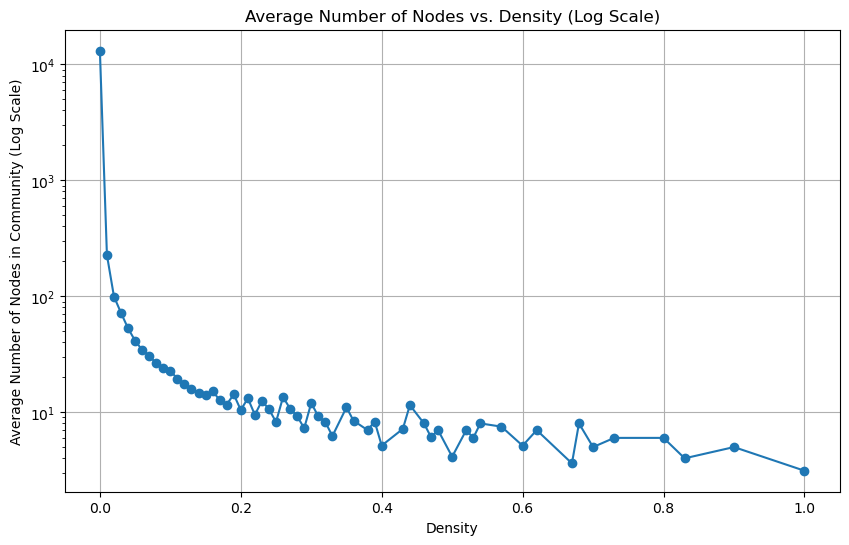

In [11]:
density_avg_node_counts = {}

for community_id, density in community_density_dict.items():
    rounded_density = round(density, 2)
    if rounded_density not in density_avg_node_counts:
        density_avg_node_counts[rounded_density] = []

    density_avg_node_counts[rounded_density].append(community_sizes[community_id])

for density in density_avg_node_counts:
    density_avg_node_counts[density] = sum(density_avg_node_counts[density]) / len(density_avg_node_counts[density])

sorted_densities = sorted(density_avg_node_counts.keys())
sorted_avg_node_counts = [density_avg_node_counts[density] for density in sorted_densities]

plt.figure(figsize=(10, 6))
plt.plot(sorted_densities, sorted_avg_node_counts, marker='o', linestyle='-')
plt.yscale('log')
plt.title('Average Number of Nodes vs. Density (Log Scale)')
plt.xlabel('Density')
plt.ylabel('Average Number of Nodes in Community (Log Scale)')
plt.grid(True)
plt.show()

In [12]:
inter_community_edges = [(u, v) for u, v in G.edges() if partition[u] != partition[v]]
print("Number of inter-community connections:", len(inter_community_edges))

Number of inter-community connections: 506074


In [13]:
density_threshold = 0.5
size_threshold = 6

target_communities = {
    community_id for community_id, size in community_sizes.items()
    if size > size_threshold and community_density_dict[community_id] < density_threshold
}
bridge_nodes = [
    node for node in G.nodes()
    if any(partition[neighbor] != partition[node] for neighbor in G.neighbors(node))
]
bridge_strength = {
    node: sum(1 for neighbor in G.neighbors(node) if partition[neighbor] in target_communities)
    for node in bridge_nodes
}

strong_bridge_nodes = {node for node, strength in bridge_strength.items() if strength > 1}

sorted_strong_bridge_nodes = sorted(strong_bridge_nodes, key=lambda node: bridge_strength[node], reverse=True)

print(f"Number of target communities: {len(target_communities)}")
print(f"Number of bridge nodes: {len(bridge_nodes)}")
print(f"Number of strong bridge nodes: {len(strong_bridge_nodes)}")
print("Top 10 strong bridge nodes by their strength:")
for node in sorted_strong_bridge_nodes[:10]:
    print(f"Node: {node}, Strength: {bridge_strength[node]}")

Number of target communities: 2660
Number of bridge nodes: 257828
Number of strong bridge nodes: 254561
Top 10 strong bridge nodes by their strength:
Node: 1072, Strength: 28704
Node: 363, Strength: 14634
Node: 35661, Strength: 11281
Node: 106, Strength: 10436
Node: 482709, Strength: 9705
Node: 663931, Strength: 8772
Node: 929, Strength: 7900
Node: 808, Strength: 6084
Node: 27837, Strength: 5392
Node: 108624, Strength: 4897


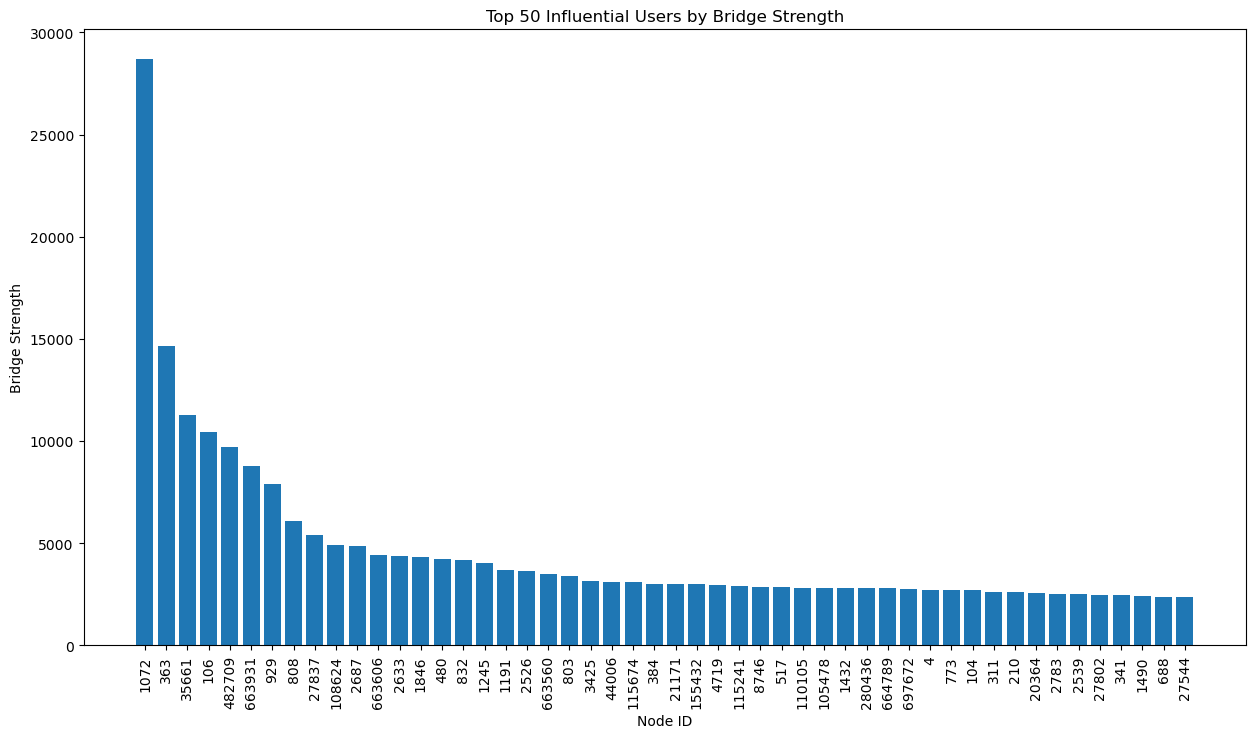

In [14]:
top_50_nodes = sorted_strong_bridge_nodes[:50]
top_50_strengths = [bridge_strength[node] for node in top_50_nodes]


plt.figure(figsize=(15, 8))
plt.bar(range(len(top_50_nodes)), top_50_strengths, tick_label=[str(node) for node in top_50_nodes])
plt.xlabel('Node ID')
plt.ylabel('Bridge Strength')
plt.title('Top 50 Influential Users by Bridge Strength')
plt.xticks(rotation=90)
plt.show()

In [15]:
community_centrality_dict = {}

for community_id in set(partition.values()):
    nodes_in_community = [nodes for nodes in partition.keys() if partition[nodes] == community_id]
    subgraph = G.subgraph(nodes_in_community)
    centrality = nx.degree_centrality(subgraph)
    community_centrality_dict[community_id] = centrality

In [16]:
average_centrality_dict = {}

for community_id, centrality_dict in community_centrality_dict.items():
    average_centrality = sum(centrality_dict.values()) / len(centrality_dict)
    average_centrality_dict[community_id] = average_centrality

most_cohesive_community = max(average_centrality_dict, key=average_centrality_dict.get)
print(f"Most cohesive community based on average centrality: {most_cohesive_community}")

Most cohesive community based on average centrality: 35


In [17]:
community_mapping = {}
with open('com-youtube.top5000.cmty.txt', 'r') as file:
    for community_id, line in enumerate(file):
        nodes = line.strip().split()
        for node in nodes:
            community_mapping[int(node)] = community_id

In [18]:
for node in G.nodes():
    G.nodes[node]['community'] = community_mapping.get(node)

bridge_nodes_community_context = []

for node in G.nodes():
    node_community = G.nodes[node].get('community')
    for neighbor in G.neighbors(node):
        neighbor_community = G.nodes[neighbor].get('community')
        if neighbor_community is not None and node_community != neighbor_community:
            bridge_nodes_community_context.append((node, node_community, neighbor_community))

In [19]:
bridge_nodes_community_context

[(1, 1, 6),
 (1, 1, 11),
 (1, 1, 19),
 (1, 1, 24),
 (1, 1, 63),
 (1, 1, 30),
 (1, 1, 474),
 (2, 6, 1),
 (2, 6, 119),
 (2, 6, 464),
 (2, 6, 534),
 (2, 6, 540),
 (2, 6, 582),
 (2, 6, 405),
 (2, 6, 596),
 (2, 6, 405),
 (2, 6, 726),
 (2, 6, 114),
 (2, 6, 752),
 (2, 6, 771),
 (2, 6, 501),
 (2, 6, 247),
 (2, 6, 830),
 (2, 6, 162),
 (2, 6, 500),
 (2, 6, 247),
 (2, 6, 162),
 (2, 6, 572),
 (2, 6, 166),
 (2, 6, 166),
 (2, 6, 834),
 (2, 6, 1150),
 (2, 6, 351),
 (2, 6, 467),
 (2, 6, 1224),
 (2, 6, 461),
 (2, 6, 1489),
 (2, 6, 1491),
 (2, 6, 1491),
 (2, 6, 1497),
 (2, 6, 431),
 (2, 6, 486),
 (2, 6, 1467),
 (2, 6, 1499),
 (2, 6, 247),
 (2, 6, 1501),
 (2, 6, 1511),
 (2, 6, 1512),
 (2, 6, 24),
 (2, 6, 1515),
 (2, 6, 224),
 (2, 6, 1518),
 (2, 6, 1519),
 (2, 6, 1520),
 (2, 6, 1521),
 (2, 6, 1523),
 (2, 6, 1524),
 (2, 6, 114),
 (2, 6, 255),
 (2, 6, 1150),
 (2, 6, 2129),
 (2, 6, 807),
 (2, 6, 451),
 (2, 6, 1758),
 (2, 6, 2305),
 (3, 1, 264),
 (4, None, 1),
 (4, None, 6),
 (4, None, 19),
 (4, None, 152),
 

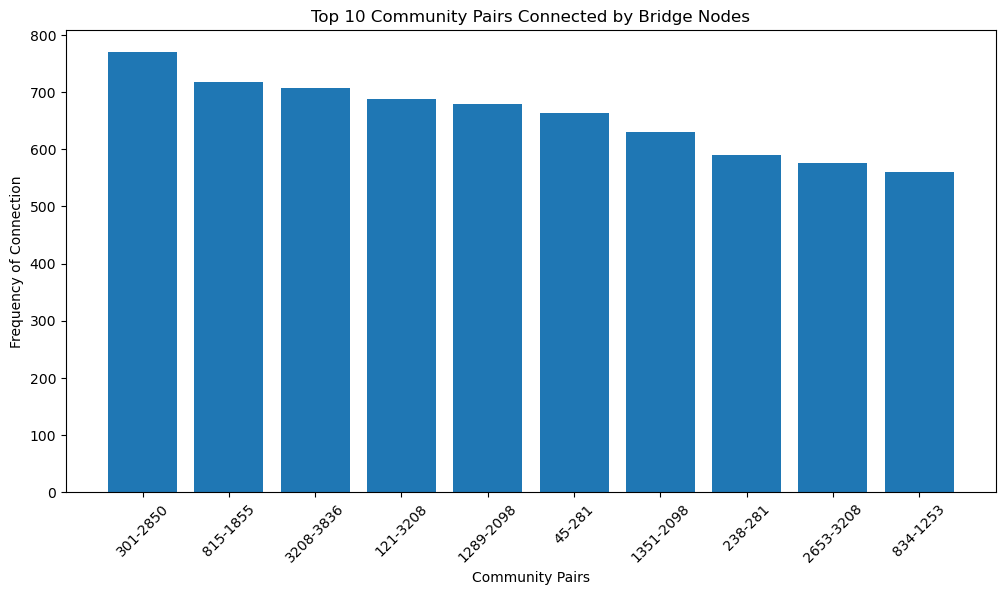

In [20]:
community_pair_connections = Counter(
    (min(node_community, connected_community), max(node_community, connected_community)) 
    for _, node_community, connected_community in bridge_nodes_community_context
    if node_community is not None and connected_community is not None
)

top_community_pairs = community_pair_connections.most_common(10)

pairs, frequencies = zip(*top_community_pairs)


plt.figure(figsize=(12, 6))
plt.bar(range(len(pairs)), frequencies, tick_label=[f'{pair[0]}-{pair[1]}' for pair in pairs])
plt.title('Top 10 Community Pairs Connected by Bridge Nodes')
plt.xlabel('Community Pairs')
plt.ylabel('Frequency of Connection')
plt.xticks(rotation=45)
plt.show()

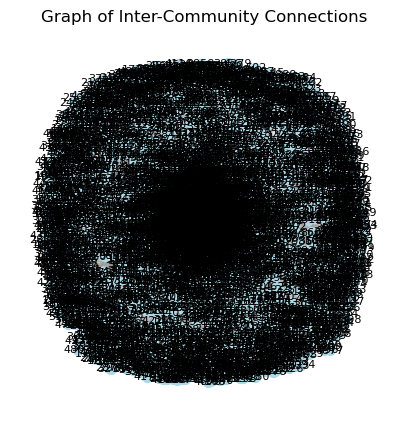

In [21]:
community_graph = nx.Graph()

for _, node_community, connected_community in bridge_nodes_community_context:
    if node_community is not None and connected_community is not None:
        community_graph.add_edge(node_community, connected_community)

plt.figure(figsize=(5, 5))

pos = nx.spring_layout(community_graph, k=0.15, iterations=20)
nx.draw_networkx_nodes(community_graph, pos, node_color='lightblue', node_size=50)
nx.draw_networkx_edges(community_graph, pos, alpha=0.1, edge_color='gray')
nx.draw_networkx_labels(community_graph, pos, font_size=8)


plt.title('Graph of Inter-Community Connections')
plt.axis('off')
plt.show()


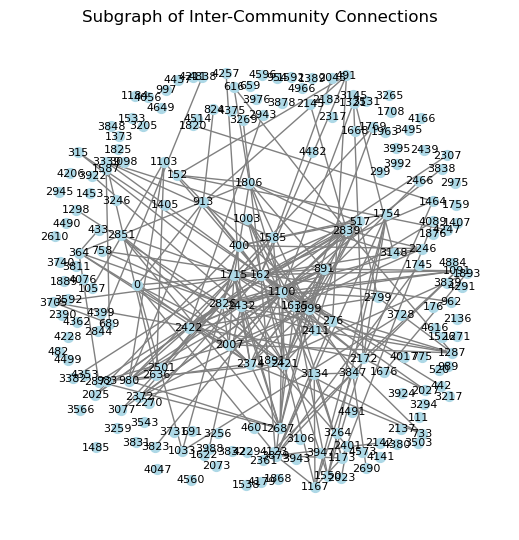

In [22]:
node_list = list(community_graph.nodes())
sample_size = int(0.05 * len(node_list))
sampled_nodes = random.sample(node_list, k=sample_size)

subgraph = community_graph.subgraph(sampled_nodes)

pos = nx.spring_layout(subgraph, k=0.5, iterations=20)


plt.figure(figsize=(5, 5))
nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=50, font_size=8)
plt.title('Subgraph of Inter-Community Connections')
plt.show()

In [23]:
def extract_features(community1, community2, graph):
    inter_community_edges = sum(1 for node in graph.nodes() if graph.nodes[node]['community'] == community1
                                for neighbor in graph.neighbors(node) if graph.nodes[neighbor]['community'] == community2)

    community1_nodes = set(node for node in graph.nodes() if graph.nodes[node]['community'] == community1)
    community2_nodes = set(node for node in graph.nodes() if graph.nodes[node]['community'] == community2)
    intersection = len(community1_nodes.intersection(community2_nodes))
    union = len(community1_nodes.union(community2_nodes))
    jaccard_coefficient = intersection / union if union != 0 else 0

    clustering_coefficient1 = nx.average_clustering(graph.subgraph(community1_nodes))
    clustering_coefficient2 = nx.average_clustering(graph.subgraph(community2_nodes))

    community1_size = len(community1_nodes)
    community2_size = len(community2_nodes)

    return [inter_community_edges, jaccard_coefficient, clustering_coefficient1, clustering_coefficient2, community1_size, community2_size]

def are_communities_close(community1, community2, graph, closeness_threshold=5, jaccard_threshold=0.05, clustering_threshold=0.3):
    features = extract_features(community1, community2, graph)
    inter_community_edges, jaccard_coefficient, clustering_coefficient1, clustering_coefficient2, _, _ = features

    return (inter_community_edges >= closeness_threshold 
            or jaccard_coefficient > jaccard_threshold 
            or (clustering_coefficient1 > clustering_threshold and clustering_coefficient2 > clustering_threshold))

In [24]:
community_pairs = list(itertools.combinations(set(community_mapping.values()), 2))

community_pairs_sampled = resample(community_pairs, n_samples=400, random_state=42)

X = []
y = []

for community1, community2 in community_pairs_sampled:
    features = extract_features(community1, community2, G)
    X.append(features)
    y.append(int(are_communities_close(community1, community2, G)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      0.40      0.57         5

    accuracy                           0.96        80
   macro avg       0.98      0.70      0.78        80
weighted avg       0.96      0.96      0.95        80



In [25]:
print("Label distribution in the full dataset:", Counter(y))

Label distribution in the full dataset: Counter({0: 381, 1: 19})


In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

xgb_model = xgb.XGBClassifier(use_label_encoder=False, random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.9906248163169341


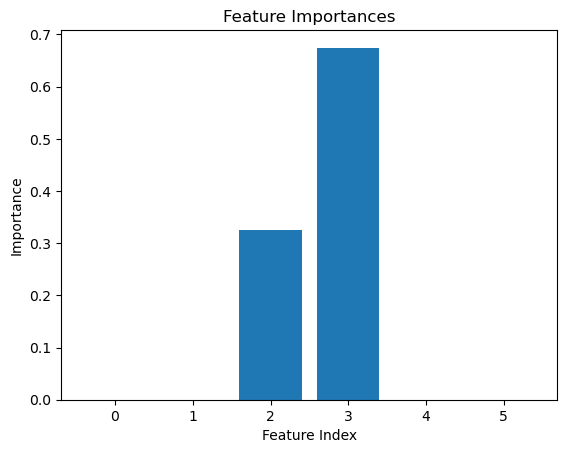

In [27]:
best_params = grid_search.best_params_
model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

feature_importances = model.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

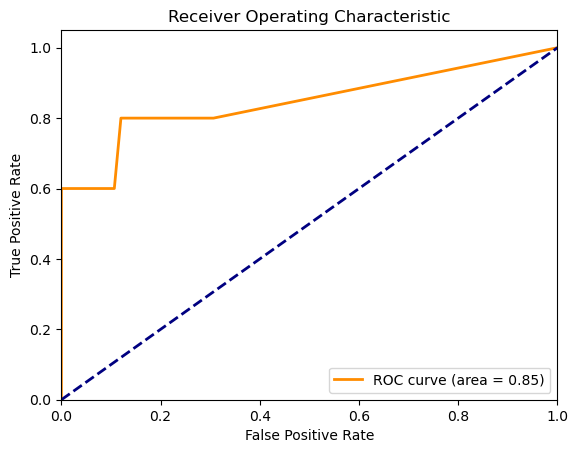

In [28]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [29]:
from sklearn.feature_selection import SelectFromModel

model.fit(X_train, y_train)

selection = SelectFromModel(model, threshold='median', prefit=True)
select_X_train = selection.transform(X_train)

selection_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
selection_model.fit(select_X_train, y_train)

select_X_test = selection.transform(X_test)
y_pred = selection_model.predict(select_X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      0.40      0.57         5

    accuracy                           0.96        80
   macro avg       0.98      0.70      0.78        80
weighted avg       0.96      0.96      0.95        80



In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(selection_model, select_X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validated scores: [1.       1.       1.       0.984375 0.984375]
Mean cross-validation score: 0.99375


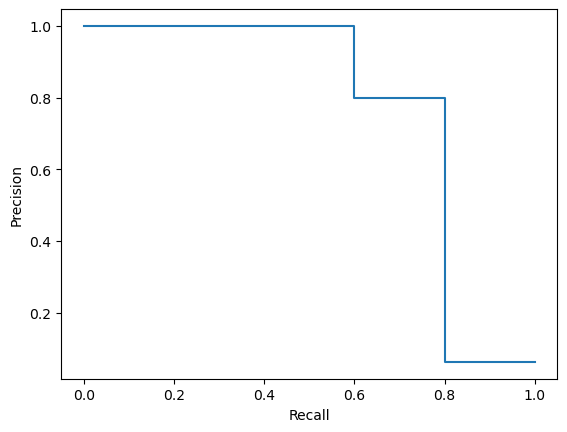

In [31]:
y_pred_prob = selection_model.predict_proba(select_X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

In [32]:
unconnected_pairs = []
for community1, community2 in itertools.combinations(set(community_mapping.values()), 2):
    if not G.has_edge(community1, community2):
        unconnected_pairs.append((community1, community2))
unconnected_pairs = unconnected_pairs[:500]

In [33]:
def extract_features(community1, community2, graph):
    inter_community_edges = sum(1 for node in graph.nodes() if graph.nodes[node]['community'] == community1
                                for neighbor in graph.neighbors(node) if graph.nodes[neighbor]['community'] == community2)

    community1_nodes = set(node for node in graph.nodes() if graph.nodes[node]['community'] == community1)
    community2_nodes = set(node for node in graph.nodes() if graph.nodes[node]['community'] == community2)
    intersection = len(community1_nodes.intersection(community2_nodes))
    union = len(community1_nodes.union(community2_nodes))
    jaccard_coefficient = intersection / union if union != 0 else 0

    clustering_coefficient1 = nx.average_clustering(graph.subgraph(community1_nodes))
    clustering_coefficient2 = nx.average_clustering(graph.subgraph(community2_nodes))

    community1_size = len(community1_nodes)
    community2_size = len(community2_nodes)

    return np.array([inter_community_edges, jaccard_coefficient, clustering_coefficient1, clustering_coefficient2, community1_size, community2_size])

unconnected_pairs = []
for community1, community2 in itertools.combinations(set(community_mapping.values()), 2):
    if not G.has_edge(community1, community2):
        unconnected_pairs.append((community1, community2))

def predict_link(community_pair):
    features = extract_features(*community_pair, G)
    probability = model.predict_proba(features.reshape(1, -1))[0, 1]
    return community_pair + (probability,)

predictions = Parallel(n_jobs=-1)(delayed(predict_link)(pair) for pair in tqdm(unconnected_pairs[:500]))

predictions.sort(key=lambda x: x[2], reverse=True)

print(len(predictions))
print(predictions[:10])


  0%|          | 0/500 [00:00<?, ?it/s]

/Users/siyuansc/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


500
[(0, 87, 0.054091096), (0, 119, 0.054091096), (0, 136, 0.054091096), (0, 155, 0.054091096), (0, 158, 0.054091096), (0, 200, 0.054091096), (0, 230, 0.054091096), (0, 240, 0.054091096), (0, 283, 0.054091096), (0, 382, 0.054091096)]


In [34]:
def extract_features(community1, community2, graph):
    inter_community_edges = sum(1 for node in graph.nodes() if graph.nodes[node]['community'] == community1
                                for neighbor in graph.neighbors(node) if graph.nodes[neighbor]['community'] == community2)

    community1_nodes = set(node for node in graph.nodes() if graph.nodes[node]['community'] == community1)
    community2_nodes = set(node for node in graph.nodes() if graph.nodes[node]['community'] == community2)
    intersection = len(community1_nodes.intersection(community2_nodes))
    union = len(community1_nodes.union(community2_nodes))
    jaccard_coefficient = intersection / union if union != 0 else 0

    clustering_coefficient1 = nx.average_clustering(graph.subgraph(community1_nodes))
    clustering_coefficient2 = nx.average_clustering(graph.subgraph(community2_nodes))

    community1_size = len(community1_nodes)
    community2_size = len(community2_nodes)

    return np.array([inter_community_edges, jaccard_coefficient, clustering_coefficient1, clustering_coefficient2, community1_size, community2_size])


unconnected_pairs = []
for community1, community2 in itertools.combinations(set(community_mapping.values()), 2):
    if not G.has_edge(community1, community2):
        unconnected_pairs.append((community1, community2))
unconnected_pairs = unconnected_pairs[:1000]

predictions = []
for community1, community2 in unconnected_pairs:
    features = extract_features(community1, community2, G)
    probability = model.predict_proba(np.array(features).reshape(1, -1))[0, 1]
    predictions.append((community1, community2, probability))

predictions.sort(key=lambda x: x[2], reverse=True)
print(len(predictions))
print(predictions)

1000
[(0, 87, 0.054091096), (0, 119, 0.054091096), (0, 136, 0.054091096), (0, 155, 0.054091096), (0, 158, 0.054091096), (0, 200, 0.054091096), (0, 230, 0.054091096), (0, 240, 0.054091096), (0, 283, 0.054091096), (0, 382, 0.054091096), (0, 384, 0.054091096), (0, 387, 0.054091096), (0, 401, 0.054091096), (0, 436, 0.054091096), (0, 477, 0.054091096), (0, 493, 0.054091096), (0, 499, 0.054091096), (0, 505, 0.054091096), (0, 506, 0.054091096), (0, 613, 0.054091096), (0, 630, 0.054091096), (0, 651, 0.054091096), (0, 679, 0.054091096), (0, 693, 0.054091096), (0, 702, 0.054091096), (0, 703, 0.054091096), (0, 726, 0.054091096), (0, 735, 0.054091096), (0, 743, 0.054091096), (0, 746, 0.054091096), (0, 748, 0.054091096), (0, 788, 0.054091096), (0, 797, 0.054091096), (0, 814, 0.054091096), (0, 818, 0.054091096), (0, 824, 0.054091096), (0, 848, 0.054091096), (0, 851, 0.054091096), (0, 852, 0.054091096), (0, 861, 0.054091096), (0, 865, 0.054091096), (0, 874, 0.054091096), (0, 916, 0.054091096), (0, 93